### Another earthquake detection at Quest!

https://earthquake.usgs.gov/earthquakes/eventpage/uw61264612#executive

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

# Import the IO (read) module from the ObsPy package
from obspy import read

In [2]:
# Read in the locally saved data
st = read('data/2017/AM/RBF6B/SHZ.D/AM.RBF6B.00.SHZ.D.2017.130', format="MSEED")
print(st)

tr = st[0]

1 Trace(s) in Stream:
AM.RBF6B.00.SHZ | 2017-05-10T00:00:03.932999Z - 2017-05-10T20:35:49.772999Z | 50.0 Hz, 3707293 samples


/home/nicole/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


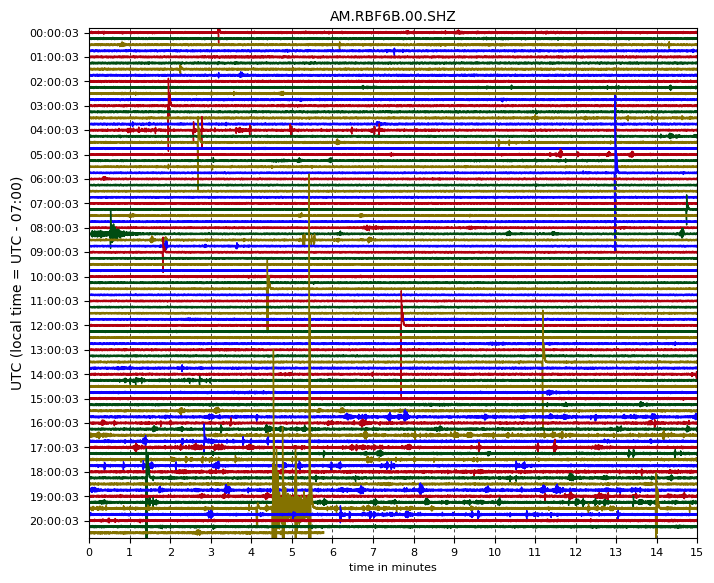

In [3]:
# Make a "dayplot"
st.plot(type='dayplot')

The earthquake is pretty clear in dark green at about 8:15 UTC. The puke green signal near the bottom at about 19:35 UTC was me walking into the room and opening/closing the fridge next to the Shake. I wanted to see how much it would pick up someone walking, which it did.

/home/nicole/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


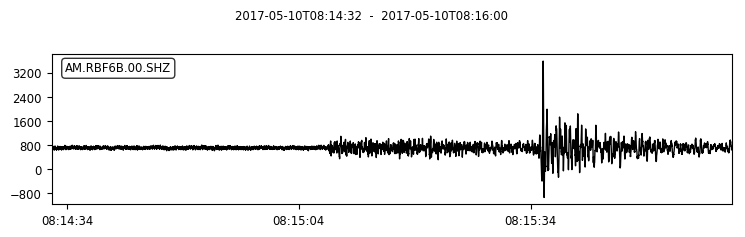

In [4]:
# Import the module to convert times into a UTC datetime object
from obspy.core import UTCDateTime

# Set the time window that we want to plot
start_t=UTCDateTime("2017-05-10T08:14:32")
end_t=UTCDateTime("2017-05-10T08:16:00")

# Plot the data
tr.plot(starttime=start_t, endtime=end_t)

[Travel times for this event](http://service.iris.edu/irisws/traveltime/1/query?evdepth=24.8&evloc=[47.580,-122.587]&staloc=[49.738,-123.101])

There are three different models to choose from in calculating the travel times, and they give different results: [iasp91](http://service.iris.edu/irisws/traveltime/1/query?model=iasp91&evdepth=24.8&distdeg=2.18), [prem](http://service.iris.edu/irisws/traveltime/1/query?model=prem&evdepth=24.8&distdeg=2.18), [ak135](http://service.iris.edu/irisws/traveltime/1/query?model=ak135&evdepth=24.8&distdeg=2.18).

I went with the one (PREM) that best fit the arrival of the P-waves though it might not be the best model for the earth between Quest and the earthquake focus.

In [5]:
# Set the travel times for plotting
event = 8.242
P_wave = 32.34/3600
S_wave = 58.26/3600

In [6]:
# Filtering with a lowpass on a copy of the original Trace
tr_filt = tr.copy()
tr_filt.filter('lowpass', freq=5.0, corners=2, zerophase=True)

AM.RBF6B.00.SHZ | 2017-05-10T00:00:03.932999Z - 2017-05-10T20:35:49.772999Z | 50.0 Hz, 3707293 samples

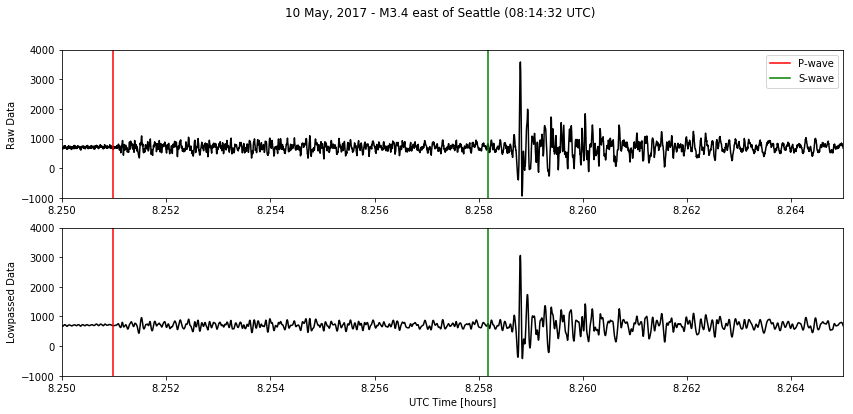

In [7]:
# Now let's plot the raw and filtered data

# Set the figure size
rcParams['figure.figsize'] = 14, 6

# Generate the time vector, using the number of points (npts) and the sampling rate (50 Hz for the Shake)
# (these parameters are in the Trace.stats() method)
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)/3600

# Set the starting and ending times for the window to plot
t_start = 8.25
t_end = 8.265

# Plotting with axes set manually for the desired time window and the x-axis converted to hours
plt.subplot(211)
plt.plot(t, tr.data, 'k')
plt.ylabel('Raw Data')
plt.axis((t_start, t_end, -1000, 4000))
plt.axvline(x=event+P_wave, color='r', label='P-wave')
plt.axvline(x=event+S_wave, color='g',label='S-wave')
plt.legend(loc='upper right')


plt.subplot(212)
plt.plot(t, tr_filt.data, 'k')
plt.axis((t_start, t_end, -1000, 4000))
plt.axvline(x=event+P_wave, color='r', label='P-wave')
plt.axvline(x=event+S_wave, color='g',label='S-wave')
plt.ylabel('Lowpassed Data')
plt.xlabel('UTC Time [hours]')
plt.suptitle('10 May, 2017 - M3.4 east of Seattle (08:14:32 UTC)')



So it looks like we detected this earthquake! Even without the lowpass filter, it is pretty easy to see the signal. The model for the travel times doesn't fit the data perfectly, but it still looks like there are clear P- and S-wave arrivals.

The specs for the Raspberry Shake are:

-Record earthquakes magnitude 2 and up within a radius of 50 miles.

-Record earthquakes magnitude 4 and up in a radius of 250 miles.

We certainly did pretty close to spe